# TableMage Demonstration

TableMage is a Python package for low-code/conversational data science. In this notebook, we provide a few examples of how the package can be used.

## Notebook Contents

1. Introduction
2. Exploratory Data Analysis
3. Regression Analysis
4. Causal Inference
5. Machine Learning
6. Conversational Data Analysis

# Section 1: Introduction

## 1.1: Installation

Let's first install the package.
On a local machine, you simply need to copy-and-paste the following code into your terminal:
```{bash}
git clone https://github.com/ajy25/TableMage.git
cd TableMage
pip install .
```
If you want to use the conversational data analysis mode, you should replace the last line with the following line:
```
pip install '.[agents]'
```
NOTE: If you are a MacOS user, you'll need to install [libomp](https://formulae.brew.sh/formula/libomp). It's a dependency for using XGBoost, a TableMage dependency.

Okay! Let's run the cell below. On Google Colab, you'll be prompted to restart the session—this is normal.

In [1]:
using_google_colab = False

If using Colab, copy and paste the following code block into a cell below and run it.
```
%%capture
!pip uninstall -y tablemage
!rm -rf TableMage
!git clone https://github.com/ajy25/TableMage.git
%cd TableMage
!pip install '.[agents]'
```

In [2]:
from pathlib import Path

project_dir = Path.cwd().parent.resolve()
import sys

sys.path.append(str(project_dir))
import tablemage as tm

print(tm.__description__)

Python package for low-code/conversational clinical data science.


## 1.2 The Analyzer Class

Now that TableMage is installed, let's try importing the package. We'll use a toy dataset from scikit-learn for now.

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

brca_dataset = load_breast_cancer()
df = pd.DataFrame(data=brca_dataset.data, columns=brca_dataset.feature_names)
df["target"] = brca_dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


The Analyzer is the bridge between the data and the analysis methods. Most likely, you'll want to do some modeling of some sort, such as linear regression or some type of machine learning regression/classification. As such, the Analyzer splits the data into a train dataset and a withheld test dataset upon initialization.

Be careful! The Analyzer will rename variables to make them easily formula-compatible (i.e., replace spaces and other prohibited characters with underscores). It is recommended that you remove spaces and special characters from variable names *before* you initialize an Analyzer, just to make sure you have full control over the names. A good rule-of-thumb is to avoid punctuation and spaces, with the exceptions of "_" and ".", which are totally fine. We'll let Analyzer handle the renaming for now.

In [4]:
analyzer = tm.Analyzer(
    df, test_size=0.2, split_seed=42, verbose=True, name="Breast Cancer"
)

# You can also split the dataset yourself, e.g. ...
# df_train, df_test = sklearn.train_test_split(df, random_state=42)
# analyzer = tm.Analyzer(df_train, df_test=df_test)

UPDT: Renamed variables 'area error', 'compactness error', 'concave points error', 
      'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 
      'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean 
      perimeter', 'mean radius', 'mean smoothness', 'mean symmetry', 'mean texture', 
      'perimeter error', 'radius error', 'smoothness error', 'symmetry error', 'texture 
      error', 'worst area', 'worst compactness', 'worst concave points', 'worst 
      concavity', 'worst fractal dimension', 'worst perimeter', 'worst radius', 'worst 
      smoothness', 'worst symmetry', 'worst texture' to 'area_error', 
      'compactness_error', 'concave_points_error', 'concavity_error', 
      'fractal_dimension_error', 'mean_area', 'mean_compactness', 'mean_concave_points', 
      'mean_concavity', 'mean_fractal_dimension', 'mean_perimeter', 'mean_radius', 
      'mean_smoothness', 'mean_symmetry', 'mean_texture', 'perimeter_error', 
      'radiu

TableMage is designed for notebooks. Many objects are display-friendly!

In [5]:
analyzer

Breast Cancer 
----------------------------------------------------------------------------------------
Train shape: (455, 31)                      Test shape: (114, 31)                       
----------------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                        
Numeric variables:
  'area_error', 'compactness_error', 'concave_points_error', 'concavity_error', 
  'fractal_dimension_error', 'mean_area', 'mean_compactness', 'mean_concave_points', 
  'mean_concavity', 'mean_fractal_dimension', 'mean_perimeter', 'mean_radius', 
  'mean_smoothness', 'mean_symmetry', 'mean_texture', 'perimeter_error', 'radius_error', 
  'smoothness_error', 'symmetry_error', 'target', 'texture_error', 'worst_area', 
  'worst_compactness', 'worst_concave_points', 'worst_concavity', 
  'worst_fractal_dimension', 'worst_perimeter', 'worst_radius', 'worst_smoothness', 
  'worst

Before we proceed, let's discuss why TableMage requires train-test splitting upon initialization. TableMage aims to accelerate data science on tabular data. Often, the end goal is to train a model to predict a target, such as whether or not a patient has breast cancer based on geometrical features, or a patient's billing amoung given the health insurer and disease type. In these cases, it is incredibly important to think in terms of pipelines, especially when transformations must be made to the data. Transformations—including missing data imputation and feature scaling—must be "fit" on the train data only. Performing data transformations based on the entire dataset is a common mistake, even for experienced data scientists.

TableMage handles all of this for you. You can explore the dataset (looking at the entire dataset or only the train or test dataset—your choice), make transformations such as imputation, feature engineering, and scaling, and immediately train a model to predict a target variable, without needing to worry about all the intermediate details! Hopefully, this will be more clear in section 5, when we discuss machine learning.

If you don't plan on doing any modeling, simply set test_size to 0.



## 1.3 Submodules

TableMage has two submodules:
1. ml: Machine learning models
2. fs: Feature selection models

Let's print an object from each. These will be discussed in greater detail in section 5.

In [6]:
print(tm.ml.LinearC())
print(tm.fs.BorutaFSR())

LinearC(l2)
BorutaFSR


# Section 2: Exploratory Data Analysis

Let's explore a dataset. We'll use the Kaggle House Prices dataset as an example since it contains a good amount of categorical and numeric features with varying levels of missingness.

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150

if using_google_colab:
    curr_dir = Path.cwd()
else:
    curr_dir = Path("__notebook__").resolve().parent

data_path = curr_dir.parent / "demo" / "regression" / "house_price_data" / "data.csv"
df = pd.read_csv(data_path, index_col=0)
analyzer = tm.Analyzer(
    df, test_size=0.2, split_seed=42, verbose=True, name="House Prices"
)
analyzer

UPDT: Analyzer initialized for dataset 'House Prices'. 


House Prices 
----------------------------------------------------------------------------------------
Train shape: (1168, 80)                      Test shape: (292, 80)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
  'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
  'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
  'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
  'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
  'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
  'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities' 
                                                                                        
Numeric 

## 2.1 Plots

We can begin our analysis by using TableMage to make plots of the dataset.

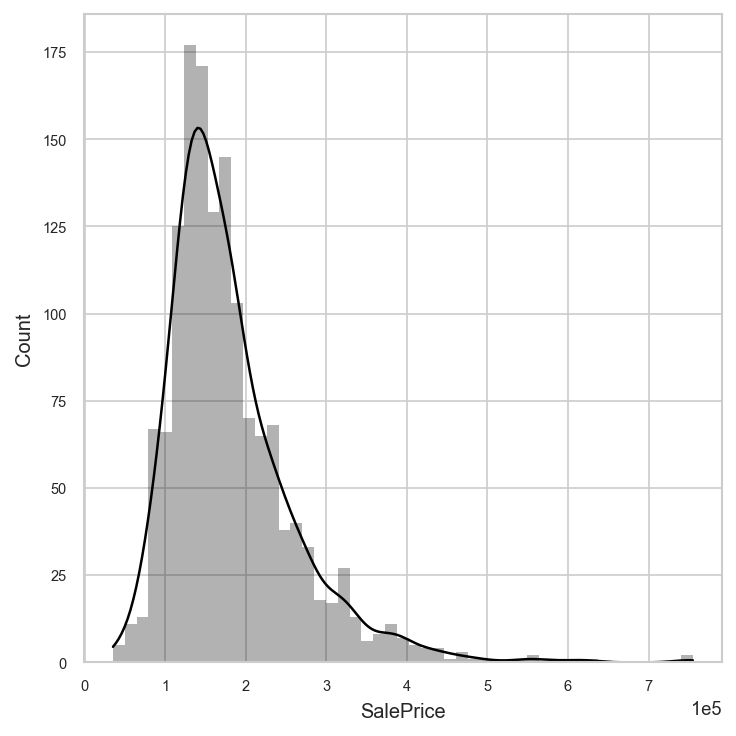

In [8]:
analyzer.eda().plot("SalePrice")

By default, Analyzer considers the entire dataset (train and test) for exploratory analysis. You can change this by specifying which dataset you would like to consider in the `analyzer.eda()` method.

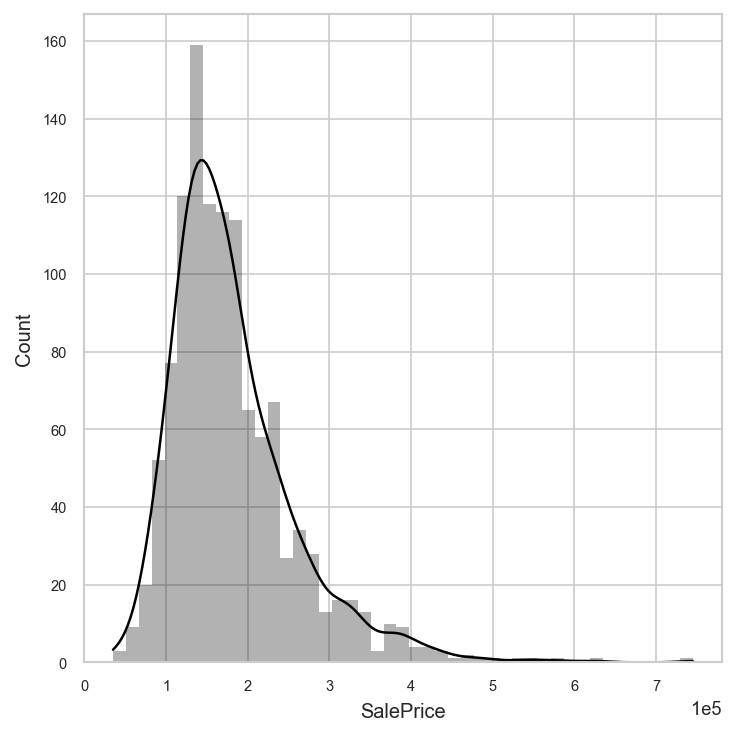

In [9]:
analyzer.eda("train").plot("SalePrice")

Let's plot the sale price versus 1st floor square footage.

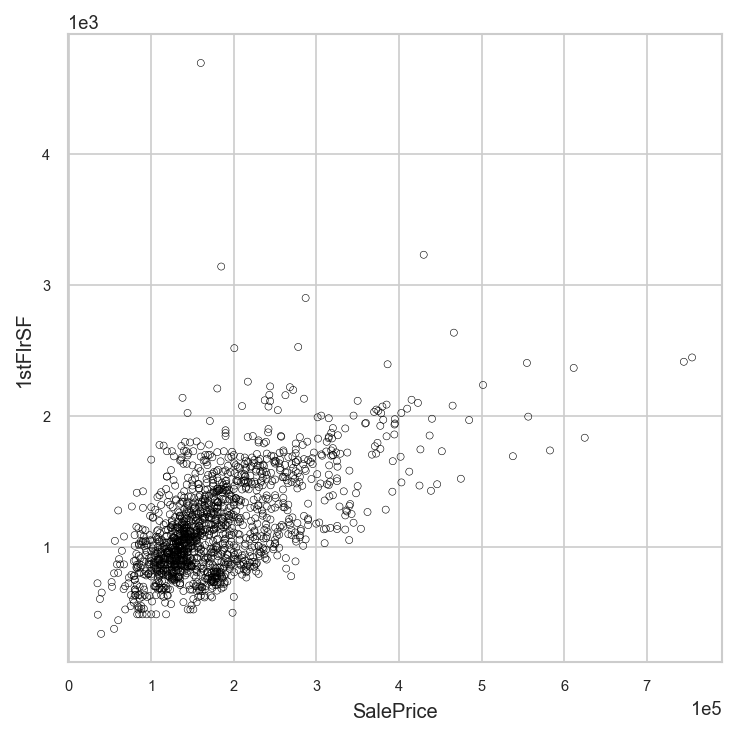

In [10]:
analyzer.eda().plot("SalePrice", "1stFlrSF")

You can plot any two variables agains each other, regardless of whether they are numeric or categorical.

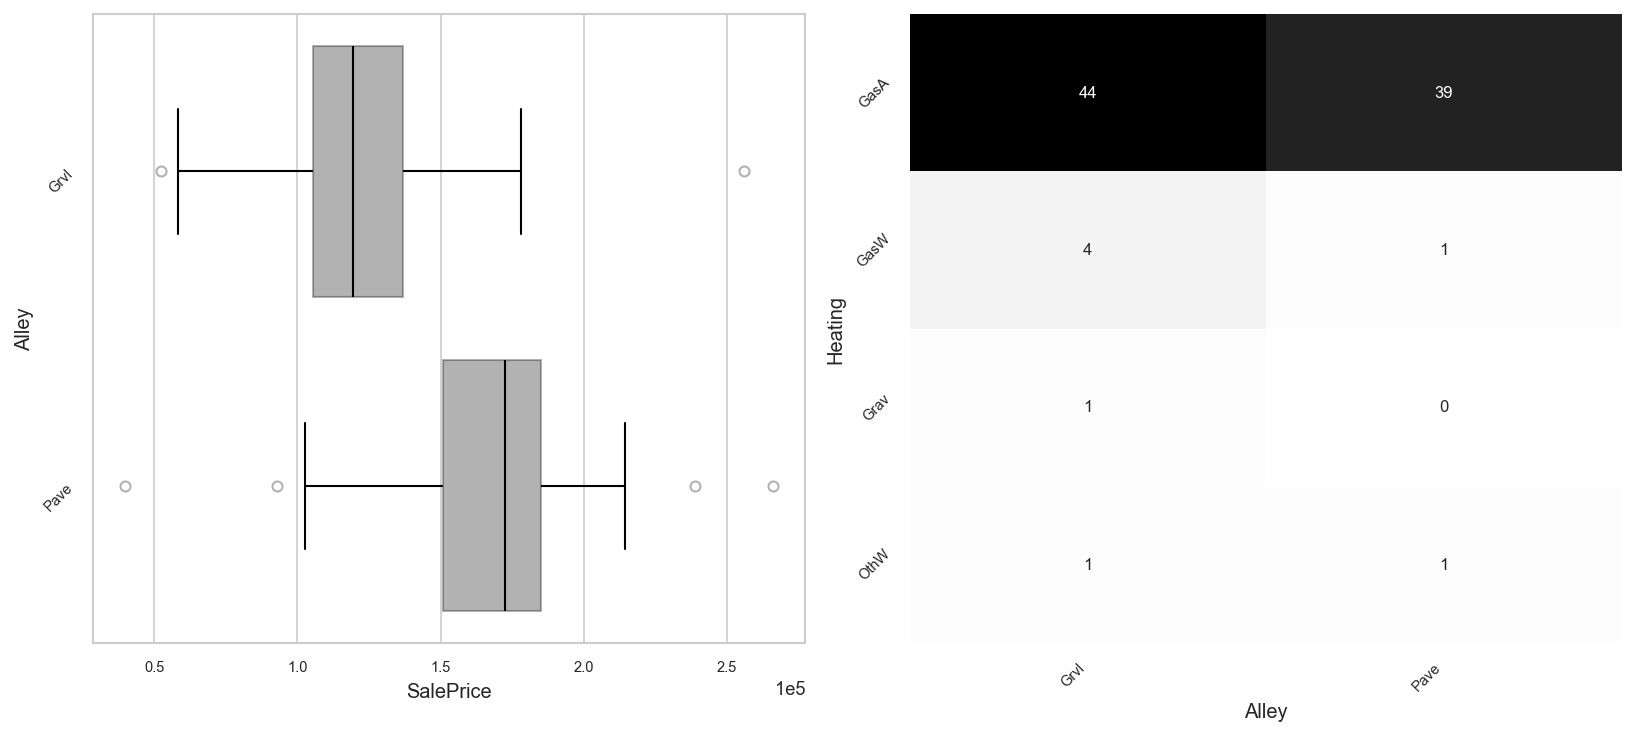

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(11, 5))
analyzer.eda().plot("SalePrice", "Alley", ax=axs[0])
analyzer.eda().plot("Alley", "Heating", ax=axs[1])

You can change colors.

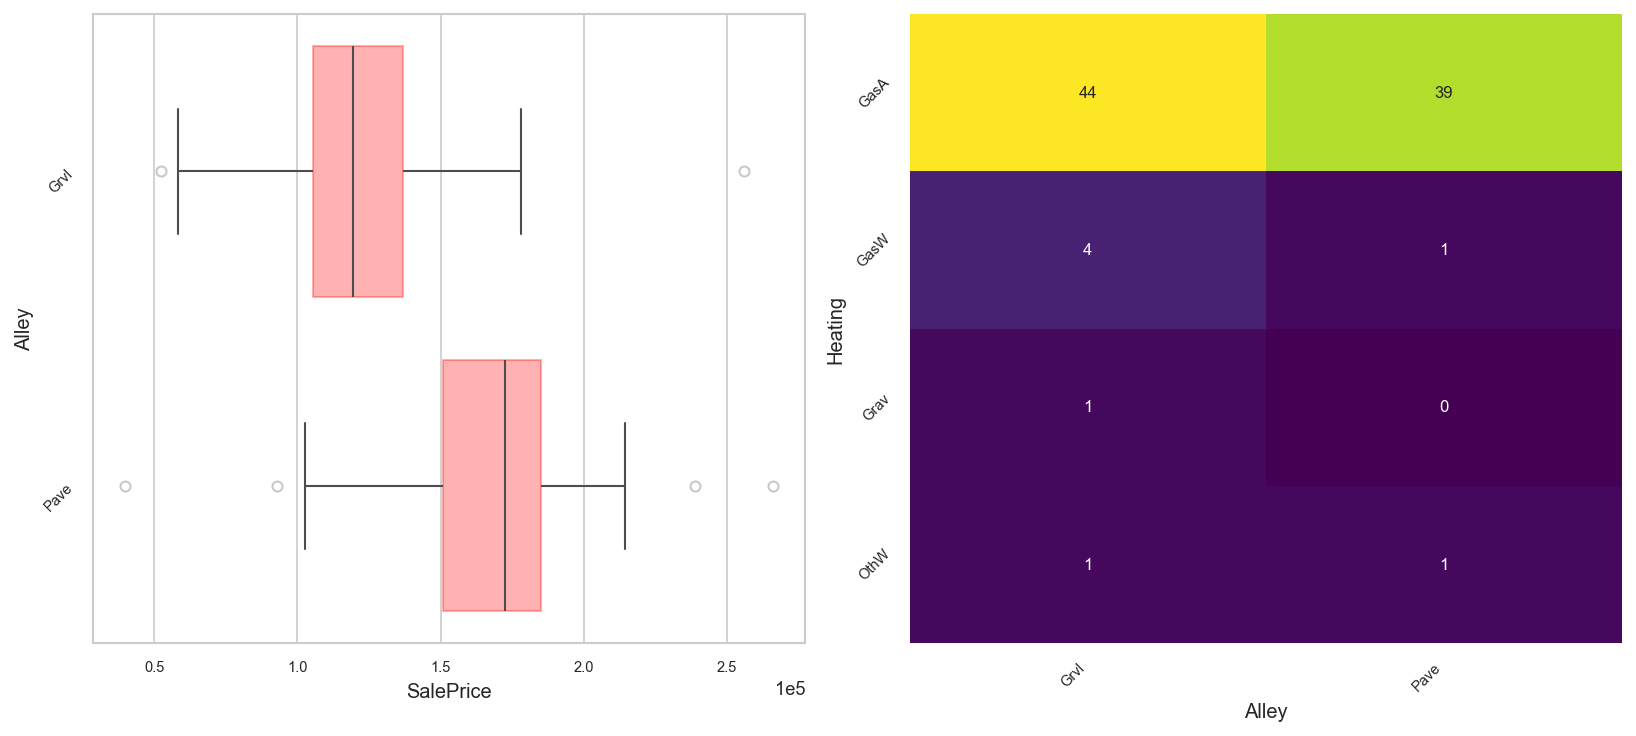

In [12]:
tm.options.plot_options.set_color_map("viridis")
tm.options.plot_options.set_bar_color("red")
fig, axs = plt.subplots(ncols=2, figsize=(11, 5))
analyzer.eda().plot("SalePrice", "Alley", ax=axs[0])
analyzer.eda().plot("Alley", "Heating", ax=axs[1])

You can make pair plots, like in R. Hypothesis tests are automatically selected based on data normality and homoskedasticity

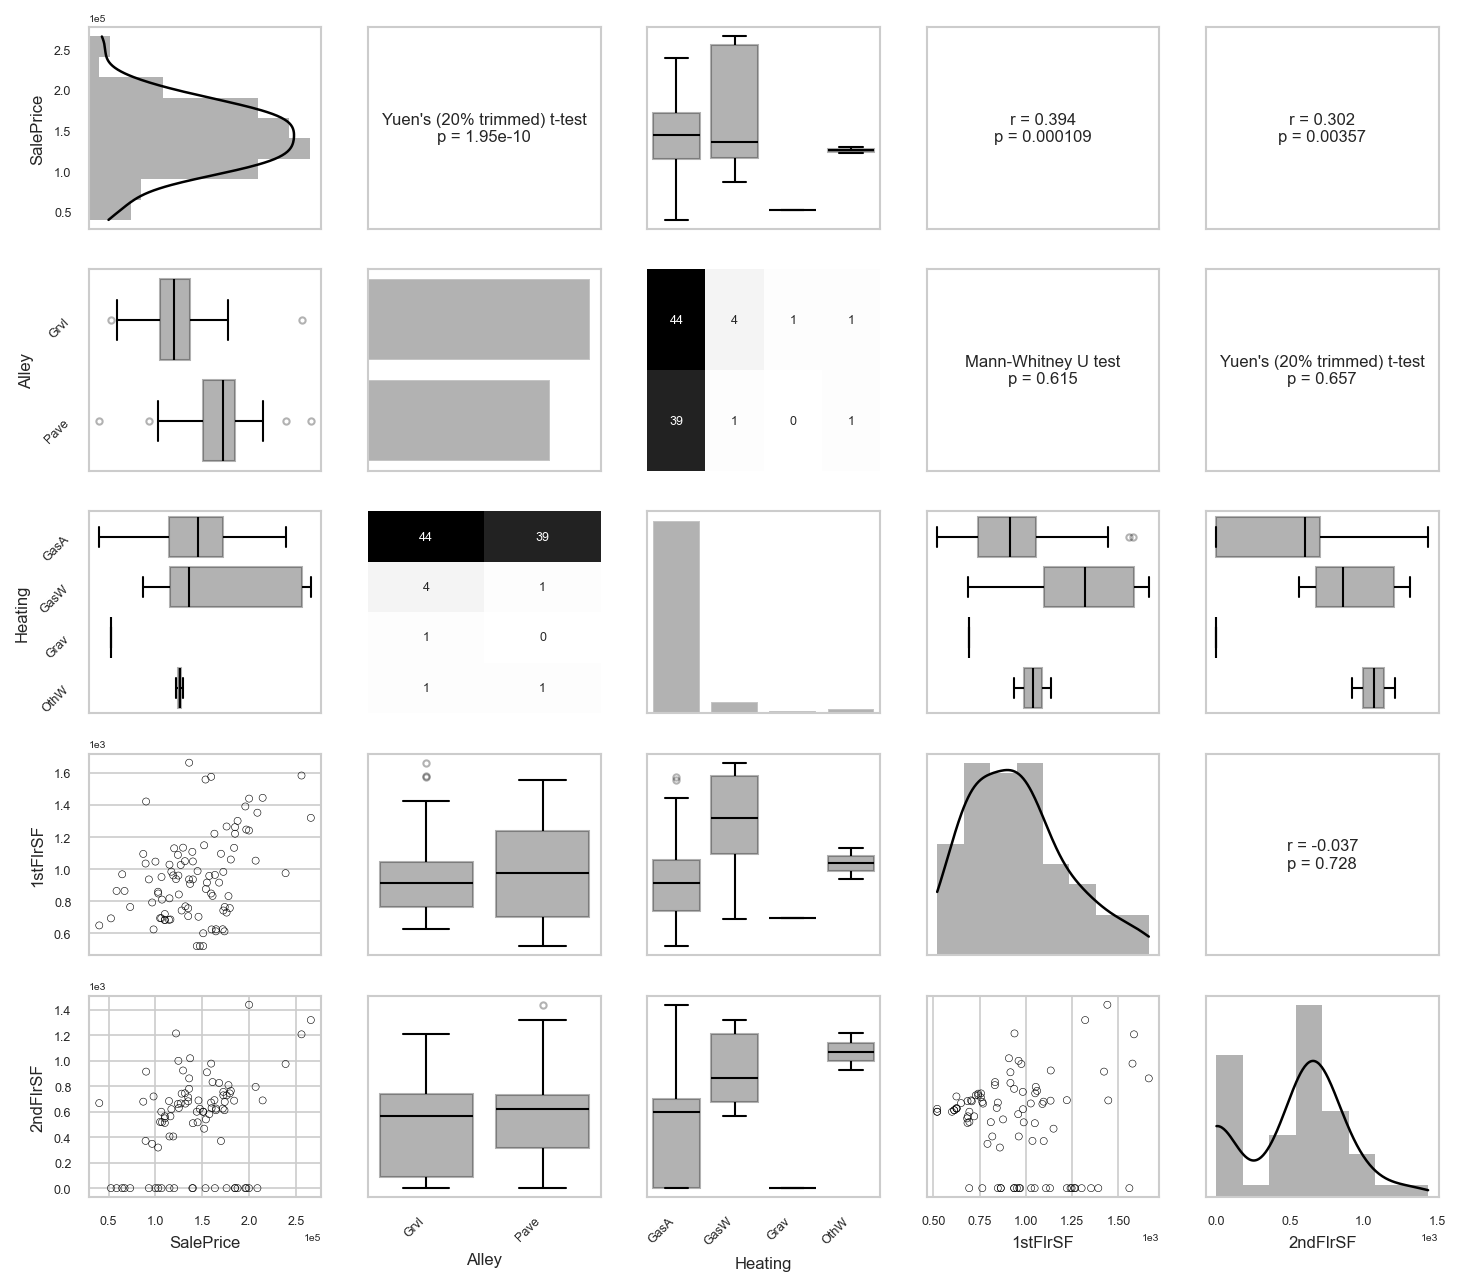

In [13]:
tm.options.plot_options.set_to_defaults()
tm.options.plot_options.set_font_sizes(
    axis_title=8, major_ticklabel=6, minor_ticklabel=5
)
analyzer.eda().plot_pairs(
    ["SalePrice", "Alley", "Heating", "1stFlrSF", "2ndFlrSF"],
    htest=True,
    figsize=(10, 10),
)

## 2.2 Tables

We can display all the basic statistics of each numerical variable.

In [14]:
analyzer.eda().numeric_stats()

Statistic,min,max,mean,std,variance,skew,kurtosis,q1,median,q3,n_missing,missing_rate,n
Variable,,,,,,,,,,,,,
1stFlrSF,334.0,4692.0,1162.627,386.588,1.494501e+05,1.375,5.722,882.00,1087.0,1391.25,0,0.000,1460
2ndFlrSF,0.0,2065.0,346.992,436.528,1.905571e+05,0.812,-0.556,0.00,0.0,728.00,0,0.000,1460
3SsnPorch,0.0,508.0,3.410,29.317,8.595060e+02,10.294,123.235,0.00,0.0,0.00,0,0.000,1460
BedroomAbvGr,0.0,8.0,2.866,0.816,6.650000e-01,0.212,2.219,2.00,3.0,3.00,0,0.000,1460
BsmtFinSF1,0.0,5644.0,443.640,456.098,2.080255e+05,1.684,11.076,0.00,383.5,712.25,0,0.000,1460
BsmtFinSF2,0.0,1474.0,46.549,161.319,2.602391e+04,4.251,20.040,0.00,0.0,0.00,0,0.000,1460
BsmtFullBath,0.0,3.0,0.425,0.519,2.690000e-01,0.595,-0.840,0.00,0.0,1.00,0,0.000,1460
BsmtHalfBath,0.0,2.0,0.058,0.239,5.700000e-02,4.099,16.336,0.00,0.0,0.00,0,0.000,1460
BsmtUnfSF,0.0,2336.0,567.240,441.867,1.952464e+05,0.919,0.469,223.00,477.5,808.00,0,0.000,1460


We can also list out all the statistics for categorical variables.

In [15]:
analyzer.eda().categorical_stats()

Statistic,n_unique,most_common,least_common,n_missing,missing_rate,n
Variable,,,,,,
Alley,2,Grvl,Pave,1369,0.937671,1460
BldgType,5,1Fam,2fmCon,0,0.0,1460
BsmtCond,4,TA,Po,37,0.025342,1460
BsmtExposure,4,No,Mn,38,0.026027,1460
BsmtFinType1,6,Unf,LwQ,37,0.025342,1460
BsmtFinType2,6,Unf,GLQ,38,0.026027,1460
BsmtQual,4,TA,Fa,37,0.025342,1460
CentralAir,2,Y,N,0,0.0,1460
Condition1,9,Norm,RRNe,0,0.0,1460


We can compute the correlation matrix for a set of numeric variables.

In [16]:
analyzer.eda().tabulate_correlation_matrix(
    ["SalePrice", "1stFlrSF", "2ndFlrSF", "YrSold"], htest=True
)

,SalePrice,1stFlrSF,2ndFlrSF,YrSold
SalePrice,1.000 (1.000),0.606 (0.000),0.319 (0.000),-0.029 (0.269)
1stFlrSF,0.606 (0.000),1.000 (1.000),-0.203 (0.000),-0.014 (0.603)
2ndFlrSF,0.319 (0.000),-0.203 (0.000),1.000 (1.000),-0.029 (0.273)
YrSold,-0.029 (0.269),-0.014 (0.603),-0.029 (0.273),1.000 (1.000)


Here's the same thing as a figure.

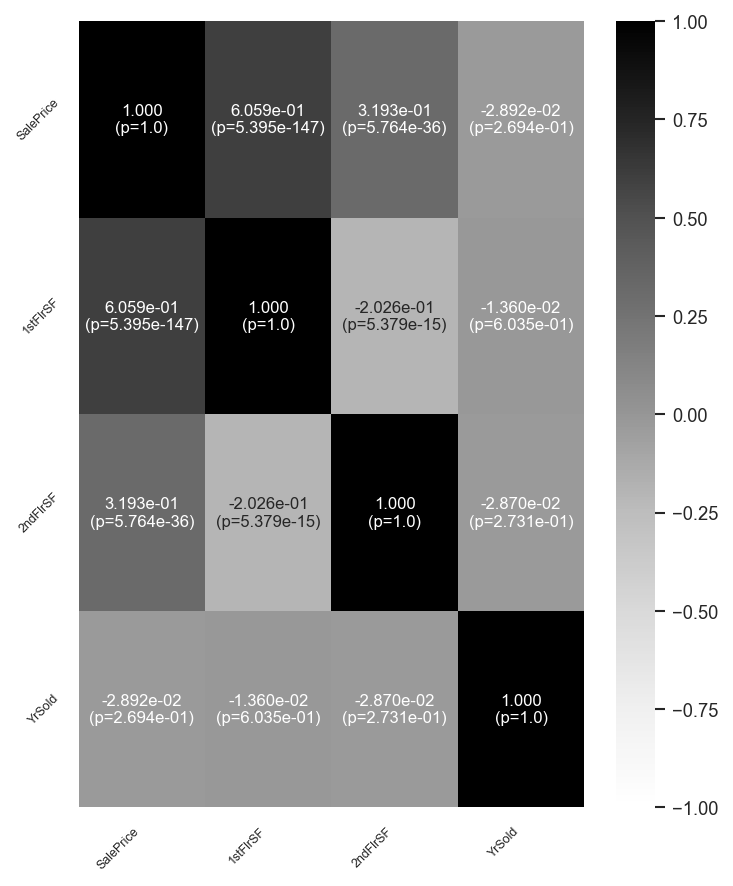

In [17]:
analyzer.eda().plot_correlation_heatmap(
    ["SalePrice", "1stFlrSF", "2ndFlrSF", "YrSold"], htest=True, figsize=(5, 6)
)

Correlations can be compared between a set of numeric variables and a specific numeric variable of interest. Here, we are interested in how square footage and year sold correlate with sale price.

In [18]:
analyzer.eda().tabulate_correlation_comparison(
    numeric_vars=["1stFlrSF", "2ndFlrSF", "YrSold"],
    target="SalePrice",
    bonferroni_correction=True,
)

,Corr. w SalePrice,p-value (Bonferroni corrected)
1stFlrSF,0.606,1.618e-146
2ndFlrSF,0.319,1.729e-35
YrSold,-0.029,8.082e-01


We leverage the Python `tableone` package to make descriptive exploratory tables.

In [19]:
analyzer.eda().tabulate_tableone(
    vars=["SalePrice", "1stFlrSF", "2ndFlrSF", "YrSold", "BldgType"],
    stratify_by="GarageFinish",
)

Grouped by GarageFinish                                                                                                       
                                            Missing             Overall                 Fin                 RFn                 Unf P-Value           Test
n                                                                  1460                 352                 422                 605                       
SalePrice, mean (SD)                              0  180921.2 (79442.5)  240052.7 (96960.6)  202068.9 (63536.2)  142156.4 (46498.5)  <0.001  One-way ANOVA
1stFlrSF, mean (SD)                               0      1162.6 (386.6)      1326.5 (479.3)      1240.6 (351.5)      1046.0 (298.4)  <0.001  One-way ANOVA
2ndFlrSF, mean (SD)                               0       347.0 (436.5)       452.3 (503.3)       341.1 (448.2)       304.5 (381.3)  <0.001  One-way ANOVA
YrSold, n (%)        2006                                    314 (21.5)           74 (21.0)           92 (21.8)          133 (22.0)   0.997    Chi-squared
                     2007                                    329 (22.5)           79 (22.4)           93 (22.0)          140 (23.1)                       
                     2008                                    304 (20.8)           74 (21.0)           89 (21.1)          118 (19.5)                       
                     2009                                    338 (23.2)           85 (24.1)           95 (22.5)          143 (23.6)                       
                     2010                                    175 (12.0)           40 (11.4)           53 (12.6)           71 (11.7)                       
BldgType, n (%)      1Fam                                   1220 (83.6)          296 (84.1)          365 (86.5)          505 (83.5)  <0.001    Chi-squared
                     2fmCon                                    31 (2.1)             3 (0.9)             2 (0.5)            17 (2.8)                       
                     Duplex                                    52 (3.6)             2 (0.6)             1 (0.2)            37 (6.1)                       
                     Twnhs                                     43 (2.9)             2 (0.6)             8 (1.9)            28 (4.6)                       
                     TwnhsE                                   114 (7.8)           49 (13.9)           46 (10.9)            18 (3.0)

# Section 3: Regression Analysis

TableMage accelerates regression analyses. Let's start with a basic example on the house prices dataset.

In [20]:
data_path = curr_dir.parent / "demo" / "regression" / "house_price_data" / "data.csv"
df = pd.read_csv(data_path, index_col=0)
analyzer = tm.Analyzer(
    df, test_size=0.2, split_seed=42, verbose=True, name="House Prices"
)
analyzer

UPDT: Analyzer initialized for dataset 'House Prices'. 


House Prices 
----------------------------------------------------------------------------------------
Train shape: (1168, 80)                      Test shape: (292, 80)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
  'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
  'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
  'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
  'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
  'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
  'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities' 
                                                                                        
Numeric 

Let's first preprocess the data some.

In [21]:
analyzer.dropna(include_vars=["SalePrice"]).impute(
    include_vars=["1stFlrSF", "2ndFlrSF", "YrSold"]
)

UPDT: Dropped 0 rows with missing values from train and 0 rows from test. 
NOTE: Numeric variables '1stFlrSF', '2ndFlrSF', 'YrSold' have no missing values. Imputer 
      will consider all specified variables regardless. 
UPDT: Imputed missing values with strategy 'median' for numeric variables '1stFlrSF', 
      '2ndFlrSF', 'YrSold'. 


House Prices 
----------------------------------------------------------------------------------------
Train shape: (1168, 80)                      Test shape: (292, 80)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
  'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
  'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
  'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
  'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
  'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
  'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities' 
                                                                                        
Numeric 

It's really easy to fit an OLS model.

In [22]:
report = analyzer.ols(target="SalePrice", predictors=["1stFlrSF", "2ndFlrSF", "YrSold"])
report

Ordinary Least Squares Regression Report
----------------------------------------------------------------------------------------
Target variable:
  'SalePrice' 
                                                                                        
Predictor variables (3):
  '1stFlrSF', '2ndFlrSF', 'YrSold' 
----------------------------------------------------------------------------------------
Metrics:
  Train (1168)                               Test (292) 
    R2:       0.548                            R2:       0.636 
    Adj. R2:  0.547                            Adj. R2:  0.633 
    RMSE:     51925.911                        RMSE:     52810.739 
----------------------------------------------------------------------------------------
Coefficients:
                            Estimate         Std. Error            p-value 
  Predictor                                                                
  const                  -876198.651        2181846.129              0.688 
  1stF

In [23]:
report.metrics(dataset="both")

OLS Linear Model
Dataset Statistic                  
train   rmse              51925.911
        mae               34482.403
        mape                  0.205
        pearsonr              0.740
        spearmanr             0.771
        r2                    0.548
        adjr2                 0.547
        n_obs              1168.000
test    rmse              52810.739
        mae               35310.444
        mape                  0.212
        pearsonr              0.813
        spearmanr             0.806
        r2                    0.636
        adjr2                 0.633
        n_obs               292.000

In [24]:
report.coefs(format="coef(se)|pval")

,Estimate (Std. Error),p-value
const,-876198.651 (2181846.129),0.688
1stFlrSF,137.096 (15.182),0.000
2ndFlrSF,80.969 (6.99),0.000
YrSold,432.707 (1086.173),0.690


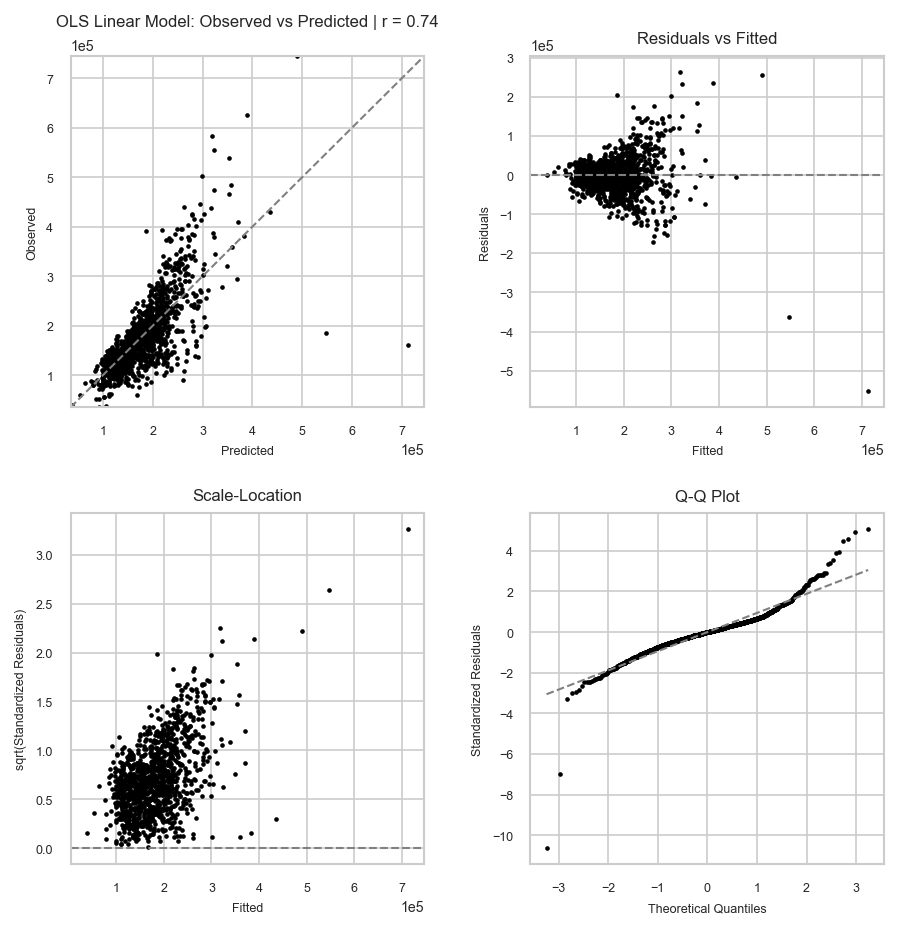

In [25]:
report.plot_diagnostics("train")

# Section 4: Causal Inference



In this section, we use the TableMage package to estimate the causal effect of education on wage using a labor market dataset.

First, we load the datsaset, as shown below.

In [26]:
data_path = curr_dir.parent / "demo" / "causal" / "data" / "card.csv"
df_causal = pd.read_csv(data_path, index_col=0)

Next, we initialize an Analyzer.

In [27]:
analyzer = tm.Analyzer(
    df_causal, test_size=0.2, split_seed=42, verbose=True, name="Labor Market Behavior"
)
analyzer

UPDT: Analyzer initialized for dataset 'Labor Market Behavior'. 


Labor Market Behavior 
----------------------------------------------------------------------------------------
Train shape: (2408, 34)                      Test shape: (602, 34)                      
----------------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                        
Numeric variables:
  'IQ', 'KWW', 'age', 'black', 'educ', 'educ_binary', 'enroll', 'exper', 'expersq', 
  'fatheduc', 'libcrd14', 'lwage', 'married', 'momdad14', 'motheduc', 'nearc2', 
  'nearc4', 'reg661', 'reg662', 'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 
  'reg668', 'reg669', 'sinmom14', 'smsa', 'smsa66', 'south', 'south66', 'step14', 
  'wage', 'weight' 

We can now make a basic causal inference model.

In [28]:
causal_model = analyzer.causal(
    treatment="educ_binary",
    outcome="lwage",
    confounders=[
        "exper",
        "expersq",
        "black",
        "smsa",
        "south",
        "smsa66",
        "reg662",
        "reg663",
        "reg664",
        "reg665",
        "reg666",
        "reg667",
        "reg668",
        "reg669",
    ],
)

We can compute the difference in means naively.

In [29]:
report = causal_model.estimate_ate(method="naive")
report

Causal Effect Estimation Report
----------------------------------------------------------------------------------------
Estimate: 0.194                             Std Err: 0.016
Estimand: Avg Trmt Effect (ATE)             p-value: 0.000e+00
----------------------------------------------------------------------------------------
Treatment variable:
  'educ_binary'
                                                                                        
Outcome variable:
  'lwage'
                                                                                        
Confounders:
  'exper', 'expersq', 'black', 'smsa', 'south', 'smsa66', 'reg662', 'reg663', 'reg664', 
  'reg665', 'reg666', 'reg667', 'reg668', 'reg669' 
----------------------------------------------------------------------------------------
Method:
  Naive Estimator (Difference in Means) 

With the introduction of these cofounders, we should estimate the ATE with a method that takes confounding into account. Let's use outcome regression.

In [30]:
report = causal_model.estimate_ate(method="outcome_regression", robust_se="nonrobust")
report

Causal Effect Estimation Report
----------------------------------------------------------------------------------------
Estimate: 0.238                             Std Err: 0.017
Estimand: Avg Trmt Effect (ATE)             p-value: 5.107e-42
----------------------------------------------------------------------------------------
Treatment variable:
  'educ_binary'
                                                                                        
Outcome variable:
  'lwage'
                                                                                        
Confounders:
  'exper', 'expersq', 'black', 'smsa', 'south', 'smsa66', 'reg662', 'reg663', 'reg664', 
  'reg665', 'reg666', 'reg667', 'reg668', 'reg669' 
----------------------------------------------------------------------------------------
Method:
  Outcome Regression 

Here's another example where we apply the IPW (inverse probability weighting) estimator to estimate the ATT (average treatment effect on the treated).

In [31]:
report = causal_model.estimate_att(method="ipw_weighted_regression", robust_se="HC0")
report

Causal Effect Estimation Report
----------------------------------------------------------------------------------------
Estimate: 0.232                             Std Err: 0.020
Estimand: Avg Trmt Effect on Trtd (ATT)     p-value: 1.975e-31
----------------------------------------------------------------------------------------
Treatment variable:
  'educ_binary'
                                                                                        
Outcome variable:
  'lwage'
                                                                                        
Confounders:
  'exper', 'expersq', 'black', 'smsa', 'south', 'smsa66', 'reg662', 'reg663', 'reg664', 
  'reg665', 'reg666', 'reg667', 'reg668', 'reg669' 
----------------------------------------------------------------------------------------
Method:
  Inverse Probability Weighting (IPW) Weighted Regression 

# Section 5: Machine Learning

Now, let's work through how to do machine learning model benchmarking using TableMage.

To begin, let's use the house price data once again.

In [32]:
import joblib
import numpy as np

data_path = curr_dir.parent / "demo" / "regression" / "house_price_data" / "data.csv"
df = pd.read_csv(data_path, index_col=0)
analyzer = tm.Analyzer(
    df, test_size=0.2, split_seed=42, verbose=True, name="House Prices"
)
analyzer

UPDT: Analyzer initialized for dataset 'House Prices'. 


House Prices 
----------------------------------------------------------------------------------------
Train shape: (1168, 80)                      Test shape: (292, 80)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
  'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
  'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
  'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
  'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
  'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
  'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities' 
                                                                                        
Numeric 

Feel free to perform any preprocessing steps.

In [33]:
analyzer.dropna(
    include_vars=["SalePrice"]
).drop_highly_missing_vars(  # drop variables with more than 30% missing values
    exclude_vars=["SalePrice"], threshold=0.3
).impute(  # impute missing values
    exclude_vars=["SalePrice"],
    numeric_strategy="5nn",
    categorical_strategy="most_frequent",
).scale(  # scale numeric variables
    exclude_vars=["SalePrice"], strategy="standardize"
)

UPDT: Dropped 0 rows with missing values from train and 0 rows from test. 
UPDT: Dropped variables 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType', 'MiscFeature', 
      'PoolQC' with at least 30.0% of values missing. 
NOTE: Numeric variables 'ScreenPorch', 'GrLivArea', 'GarageCars', '2ndFlrSF', 
      'BsmtFinSF2', 'PoolArea', 'BsmtFullBath', 'YearRemodAdd', 'WoodDeckSF', 
      'BsmtUnfSF', 'TotalBsmtSF', 'MiscVal', 'BsmtHalfBath', 'OverallCond', 
      'BedroomAbvGr', 'BsmtFinSF1', 'MoSold', 'OpenPorchSF', 'TotRmsAbvGrd', 'FullBath', 
      'YearBuilt', 'GarageArea', '3SsnPorch', 'OverallQual', '1stFlrSF', 'YrSold', 
      'LowQualFinSF', 'Fireplaces', 'HalfBath', 'MSSubClass', 'KitchenAbvGr', 'LotArea', 
      'EnclosedPorch' have no missing values. Imputer will consider all specified 
      variables regardless. 
NOTE: Categorical variables 'RoofMatl', 'LotConfig', 'LandContour', 'Foundation', 
      'Exterior1st', 'HeatingQC', 'Condition1', 'Neighborhood', 'RoofStyle', 'Street', 
 

House Prices 
----------------------------------------------------------------------------------------
Train shape: (1168, 74)                      Test shape: (292, 74)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 
  'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 
  'Exterior1st', 'Exterior2nd', 'Foundation', 'Functional', 'GarageCond', 
  'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 
  'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 
  'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 
  'Street', 'Utilities' 
                                                                                        
Numeric variables:
  '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtF

We can use the `regress` function in our analyzer to properly benchmark certain models. In this case, we compare the Random Forest, XGBoost, and linear regression models.

In [34]:
reg_report = analyzer.regress(
    models=[
        tm.ml.LinearR("l2"),
        tm.ml.TreesR("random_forest"),
        tm.ml.TreesR("xgboost"),
    ],
    target="SalePrice",
    predictors=["1stFlrSF", "2ndFlrSF", "YrSold", "BldgType", "MSZoning", "LotShape"],
    feature_selectors=[tm.fs.BorutaFSR()],  # select features
)

PROG: Fitting 'BorutaFSR'. 
UPDT: Fitting model 'LinearR(l2)'. 
PROG: Fitting 'LinearR(l2)'. Search method: OptunaSearchCV (100 trials, 500 total fits). 
       
UPDT: Successfully evaluated model 'LinearR(l2)'. 
UPDT: Fitting model 'TreesR(random_forest)'. 
PROG: Fitting 'TreesR(random_forest)'. Search method: OptunaSearchCV (100 trials, 500 
      total fits).  
UPDT: Successfully evaluated model 'TreesR(random_forest)'. 
UPDT: Fitting model 'TreesR(xgboost)'. 
PROG: Fitting 'TreesR(xgboost)'. Search method: OptunaSearchCV (100 trials, 500 total 
      fits).  
UPDT: Successfully evaluated model 'TreesR(xgboost)'. 


Lastly, we can compare model metrics and save models for future use.

In [35]:
# Compare model performance
display(reg_report.metrics("test"))

# Predict on new data
new_df = df.sample(frac=0.3)
new_df = new_df.drop(columns=["SalePrice"])

y_pred = reg_report.model("LinearR(l2)").sklearn_pipeline().predict(new_df)

# Save model as sklearn pipeline
joblib.dump(reg_report.model("LinearR(l2)").sklearn_pipeline(), "l2_pipeline.joblib")

# Load model and predict on new data
y_pred_from_save = joblib.load("l2_pipeline.joblib").predict(new_df)
assert np.allclose(y_pred, y_pred_from_save)

,LinearR(l2),TreesR(random_forest),TreesR(xgboost)
Statistic,,,
rmse,50294.432,47174.405,45710.156
mae,32321.420,30499.842,29765.441
mape,0.194,0.187,0.180
pearsonr,0.832,0.849,0.859
spearmanr,0.861,0.866,0.870
r2,0.670,0.710,0.728
adjr2,0.666,0.706,0.724
n_obs,292.000,292.000,292.000


# Section 6: Conversational Data Analysis

In this section, we demonstrate how to use TableMage's conversational data analysis capabilities. This is particularly useful for no-code use of the package, helping those that may not have the background necessary to do thorough data analysis on their datasets.

First, we enable the use of agents in TableMage with the `tm.use_agents()` function.

In [36]:
import tablemage as tm

data_path = curr_dir.parent / "demo" / "regression" / "house_price_data" / "data.csv"
df = pd.read_csv(data_path, index_col=0)

In [37]:
from IPython.display import Markdown

tm.use_agents()

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


UPDT: The 'tablemage.agents' module has been imported. 




We then set the API key for the OpenAI agent using the `tm.agents.set_key` method. We also configure the agent to use the GPT-5.1 model with the `tm.agents.options.set_llm` method.

In [38]:
tm.agents.set_key(
    llm_type="openai",
    api_key="your-key-here",
)
tm.agents.options.set_llm(llm_type="openai", model_name="gpt-5.1")

We initialize a `ChatDA` agent with the training dataset `df` and a test size of 20%.

In [39]:
agent = tm.agents.ChatDA(df=df, test_size=0.2, verbose=False)

We interact with the agent through the `chat` method.

In [40]:
response = agent.chat("Tell me about the dataset.")
Markdown(response)

Here’s what your summary tells us about the dataset:

1. **Size and structure**
   - **Training set**: 1,168 rows × 80 columns  
   - **Test set**: 292 rows × 80 columns  
   - This is a **moderate-sized tabular dataset**, typical for housing/real estate problems.

2. **Variable types**
   - **37 numeric variables** – continuous or discrete counts, e.g.:
     - Size-related: `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `LotArea`, `MasVnrArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `ScreenPorch`, `PoolArea`, `LowQualFinSF`, `3SsnPorch`
     - Counts: `BedroomAbvGr`, `TotRmsAbvGrd`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`, `Fireplaces`, `GarageCars`, `KitchenAbvGr`
     - Quality/overall scores (ordinal, but stored numeric): `OverallQual`, `OverallCond`
     - Time-related: `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`, `YrSold`, `MoSold`
     - Others: `MSSubClass`, `LotFrontage`, `MiscVal`, and crucially **`SalePrice`**.
   - **43 categorical variables** – building, quality, location, and condition descriptors, e.g.:
     - Location/land: `Neighborhood`, `MSZoning`, `LotShape`, `LandContour`, `LotConfig`, `LandSlope`, `Street`, `Alley`
     - Exterior: `Exterior1st`, `Exterior2nd`, `RoofStyle`, `RoofMatl`
     - Basement / garage: `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`
     - Quality/condition (ordinal but stored as categories): `ExterQual`, `ExterCond`, `HeatingQC`, `KitchenQual`, `Functional`, `FireplaceQu`, `Fence`, `PoolQC`
     - House configuration: `BldgType`, `HouseStyle`, `Foundation`, `Heating`, `CentralAir`, `PavedDrive`
     - Transaction: `SaleType`, `SaleCondition`, `Utilities`, `MiscFeature`

3. **Likely task**
   - Presence of **`SalePrice`** (numeric) suggests a **supervised regression problem**: predicting house sale prices from structural, quality, and location features.
   - The test set with the same 80 features (presumably without `SalePrice`) is likely intended for out-of-sample evaluation or competition-style scoring.

4. **Characteristics/considerations**
   - Many variables are **housing attributes** (structure + location + condition), matching the classic **Ames housing** dataset style.
   - You have a mix of:
     - **Continuous features** (areas, frontage, lot size),
     - **Discrete counts** (rooms, baths, cars),
     - **Ordinal categories coded as text** (e.g., quality from Poor→Excellent),
     - **Potentially sparse features** (e.g., `PoolQC`, `MiscFeature`, `Alley` often have many missing values in similar datasets).
   - There are **many categorical variables (43)**, so modeling will require:
     - Some form of **encoding** (e.g., one-hot encoding),
     - Care about **high-cardinality** variables such as `Neighborhood`.

If you’d like, the next steps I’d suggest are:
- Show summary stats of **`SalePrice`** (distribution, range, skewness).
- Inspect **missing values** by variable.
- Look at simple **relationships with price** (e.g., `OverallQual`, `GrLivArea`, `Neighborhood`).

In [41]:
response = agent.chat("""Provide the summary statistics. 
    Also help me figure out which variables are highly correlated with SalePrice.
    """)
Markdown(response)

Here’s what we can say from your data.

## 1. Summary statistics

### 1.1. Target variable: SalePrice

- Count: 1,460
- Mean: 180,921
- Std dev: 79,443
- Min: 34,900  
- 25%: 129,975  
- Median (50%): 163,000  
- 75%: 214,000  
- Max: 755,000  

Implications:
- Prices are quite spread out (std ~ 80k).
- Strong right skew (few very expensive houses).

### 1.2. Numeric variables (high level)

For each numeric variable you have:
- `min`, `max`, `mean`, `std`, `variance`
- Quartiles (q1, median, q3)
- Shape: `skew`, `kurtosis`
- Missingness: `n_missing`, `missing_rate`

Examples:
- `GrLivArea` (above-ground living area):
  - Mean: 1,515 sq ft, Std: 525, Min: 334, Max: 5,642
  - Skew ~ 1.37 (right-skewed, some very large houses)
  - No missing values
- `OverallQual` (overall material/finish quality, 1–10):
  - Mean: 6.10, Std: 1.38, IQR: 5–7
- Variables with notable missingness:
  - `LotFrontage`: 17.7% missing  
  - `GarageYrBlt`: 5.5% missing  
  - `MasVnrArea`: 0.5% missing  

(If you want, I can list the full numeric summary table explicitly, but it’s quite long.)

### 1.3. Categorical variables (high level)

For each categorical variable you have:
- Number of unique categories
- Most common and least common category
- Missingness

Notable:
- Very high missingness:
  - `PoolQC`: 99.5% missing
  - `MiscFeature`: 96.3% missing
  - `Alley`: 93.8% missing
  - `Fence`: 80.8% missing
  - `MasVnrType`: 59.7% missing
  - `FireplaceQu`: 47.3% missing
- Neighborhood has 25 categories; most common is `NAmes`.

These highly-missing variables may need special treatment (e.g., treat “missing” as its own category, or drop if not informative).

---

## 2. Variables most correlated with SalePrice

Among numeric predictors, the top correlations with `SalePrice` are:

| Variable       | Correlation with SalePrice |
|----------------|----------------------------|
| OverallQual    | 0.79                       |
| GrLivArea      | 0.71                       |
| GarageCars     | 0.64                       |
| GarageArea     | 0.62                       |
| TotalBsmtSF    | 0.61                       |
| 1stFlrSF       | 0.61                       |
| FullBath       | 0.56                       |
| TotRmsAbvGrd   | 0.53                       |
| YearBuilt      | 0.52                       |
| YearRemodAdd   | 0.51                       |

Interpretation:
- **OverallQual** is the single strongest linear predictor of price.
- Size variables (**GrLivArea**, **TotalBsmtSF**, **1stFlrSF**, **GarageArea**) are all strongly positively related to price.
- **Garage capacity**, **number of full baths**, and **total rooms** also matter.
- Newer homes (**YearBuilt**, **YearRemodAdd**) sell for more, on average.

---

## 3. Suggested next steps

If you’d like to go further, we can:
- Visualize `SalePrice` vs. these top predictors (scatterplots, log-transform if needed).
- Check correlations among predictors (to understand multicollinearity).
- Start a simple baseline model using just the top few variables.

In [42]:
response = agent.chat("""Help me predict the SalePrice with linear regression. 
    Choose the predictors you think are most relevant.
    """)
Markdown(response)

Here’s a linear regression model for `SalePrice` using a focused set of strong, interpretable predictors.

## 1. Predictors I chose

Based on prior correlation analysis and standard practice for this dataset, I used these numeric predictors:

- `OverallQual` – overall material/finish quality  
- `GrLivArea` – above-ground living area (sq ft)  
- `GarageCars` – number of car spaces in garage  
- `GarageArea` – size of garage (sq ft)  
- `TotalBsmtSF` – total basement area (sq ft)  
- `1stFlrSF` – first floor area (sq ft)  
- `FullBath` – number of full bathrooms above ground  
- `TotRmsAbvGrd` – total rooms above ground  
- `YearBuilt` – original construction year  
- `YearRemodAdd` – remodel year  

All observations were complete for these variables (n = 1,460).

The model is an ordinary least squares (OLS) linear regression:

\[
\text{SalePrice} = \beta_0 + \sum \beta_j X_j + \varepsilon
\]

## 2. Model performance

- R² = 0.774  
- Adjusted R² = 0.772  

Interpretation: about 77% of the variation in `SalePrice` is explained by this set of predictors.

## 3. Key coefficients (effects)

Each coefficient is the *average* change in `SalePrice` when that predictor increases by 1 unit, holding the others fixed.

Significant predictors (p < 0.05):

- `OverallQual`: **+19,605** per 1-point increase (on 1–10 scale)  
- `GrLivArea`: **+51** per additional sq ft  
- `GarageCars`: **+10,418** per additional car space  
- `TotalBsmtSF`: **+19.9** per additional sq ft  
- `1stFlrSF`: **+14.2** per additional sq ft  
- `FullBath`: **−6,791** per additional full bath (see note below)  
- `YearBuilt`: **+268** per year  
- `YearRemodAdd`: **+296** per year  

Not statistically significant (in presence of the others):

- `GarageArea` (p ≈ 0.15)  
- `TotRmsAbvGrd` (p ≈ 0.98)

Notes:
- `FullBath` showing a negative coefficient is likely due to **multicollinearity** with `GrLivArea`, `TotRmsAbvGrd`, etc. Larger houses tend to have more bathrooms; once you hold the other size variables constant, “extra baths” may not add much or can flip sign.
- The very large **condition number (~4.7e5)** further indicates multicollinearity among size-related variables.

The intercept:
- `const` ≈ −1,186,194  
  This isn’t directly meaningful because it corresponds to an impossible combination of predictor values (e.g., year 0, zero area, etc.), so we typically ignore its standalone interpretation.

## 4. How to use this model

In plain form, your prediction equation is approximately:

\[
\begin{aligned}
\widehat{\text{SalePrice}} &= -1{,}186{,}194 \\
&+ 19{,}605 \cdot \text{OverallQual} \\
&+ 51.30 \cdot \text{GrLivArea} \\
&+ 10{,}418 \cdot \text{GarageCars} \\
&+ 14.95 \cdot \text{GarageArea} \\
&+ 19.87 \cdot \text{TotalBsmtSF} \\
&+ 14.17 \cdot \text{1stFlrSF} \\
&- 6{,}791 \cdot \text{FullBath} \\
&+ 33.11 \cdot \text{TotRmsAbvGrd} \\
&+ 268.24 \cdot \text{YearBuilt} \\
&+ 296.48 \cdot \text{YearRemodAdd}
\end{aligned}
\]

(Values in currency units are in the same units as `SalePrice` in your data.)

## 5. Suggested refinements

If you want to improve or simplify this model, next steps could be:

- Drop weak predictors (`GarageArea`, `TotRmsAbvGrd`) and refit.
- Reduce multicollinearity by:
  - Choosing **one** or two core size measures (e.g., `GrLivArea`, `TotalBsmtSF`) instead of several overlapping ones, or  
  - Creating composite features (e.g., total finished area).
- Consider a log-transform of `SalePrice` (and maybe heavily-skewed predictors) to better handle skew and outliers.

If you’d like, I can:
- Refit a **simplified model** with fewer, more stable predictors, or  
- Train a model on `log(SalePrice)` and show you the updated performance and coefficients.

In [43]:
response = agent.chat(
    """Fit some machine learning models to try to obtain better predictive performance.
    Do whatever you think would be best for performance.
    Let me know which model is best and how it performs.
    Tell me also how you trained that model.
    """
)
Markdown(response)

Here’s what I did and what worked best.

## 1. Models trained and comparison

I focused on predicting `SalePrice` using a strong numeric subset:

**Predictors used** (selected via Boruta feature selection):
- `OverallQual`
- `GrLivArea`
- `GarageCars`
- `GarageArea`
- `TotalBsmtSF`
- `1stFlrSF`
- `FullBath`
- `YearBuilt`
- `YearRemodAdd`

Then I trained and tuned these regression models, with an internal train/test split (about 80/20: 1,168 train, 292 test):

- Linear models: **OLS**, **Ridge**, **Lasso**, **ElasticNet**
- Nonlinear: **Random Forest (RF)**, **XGBoost**
- **SVM** (RBF kernel)

**Test-set performance (the metric that really matters):**

- OLS: R² = 0.797, RMSE ≈ 39,459
- Ridge: R² = 0.797, RMSE ≈ 39,447
- Lasso: R² = 0.797, RMSE ≈ 39,459
- ElasticNet: R² = 0.797, RMSE ≈ 39,444
- **Random Forest: R² = 0.876, RMSE ≈ 30,864**
- XGBoost: R² = 0.866, RMSE ≈ 32,087
- SVM: R² ≈ −0.038, RMSE ≈ 89,244 (performed very poorly)

**Best model:**  
➡️ **Random Forest** is clearly the best: highest R² (0.876) and lowest RMSE (~30.9k) on the hold-out test set, substantially better than any linear model (R² ≈ 0.80, RMSE ≈ 39.4k) and a bit better than XGBoost.

Roughly, Random Forest reduces test RMSE by about:
- 21–22% vs your OLS baseline (≈ 39.5k → ≈ 30.9k)

## 2. How the best model (Random Forest) was trained

**Data & features**

- Target: `SalePrice` (untransformed).
- Features:  
  `OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt, YearRemodAdd`
- Only complete cases were used (no missingness for these variables in this dataset).

**Train/test split**

- Train size: 1,168 observations  
- Test size: 292 observations  
- The metrics above are evaluated on this unseen test set.

**Model type**

- Ensemble of decision trees: **Random Forest Regressor**.

**Hyperparameter tuning**

I did automated hyperparameter search with cross-validation:

- Search space included:
  - `n_estimators`: {50, 100, 200, 400}
  - `max_depth`: integers from 3 to 15 (step 2)
  - `min_samples_split`: {2, 5, 10}
  - `min_samples_leaf`: {1, 2, 4}
  - `max_features`: {'sqrt', 'log2'}
- 5-fold cross-validation inside the training set.
- 100 optimization trials to find hyperparameters that best minimized cross-validated error.

**Best-found hyperparameters**

The final (best) Random Forest used:

- `n_estimators`: **200**
- `max_depth`: **13**
- `min_samples_split`: **10**
- `min_samples_leaf`: **1**
- `max_features`: **'log2'**

This configuration balances model complexity and overfitting fairly well (high training R² but also high test R²).

**Feature importance (from Random Forest)**

Relative importance of each predictor in the best model:

- `OverallQual`: **0.298**
- `GrLivArea`: **0.192**
- `GarageCars`: **0.137**
- `YearBuilt`: **0.090**
- `TotalBsmtSF`: **0.082**
- `1stFlrSF`: **0.062**
- `GarageArea`: **0.071**
- `FullBath`: **0.035**
- `YearRemodAdd`: **0.034**

Interpretation: `OverallQual` and `GrLivArea` are the dominant drivers of predictions, but garage capacity, house age, and basement/first-floor area all contribute meaningfully.

## 3. Summary

- Your original OLS linear regression explained ~77–80% of variance with RMSE around 39–40k.
- A **tuned Random Forest** using 9 numeric predictors now explains **~88%** of variance with **RMSE ~30.9k** on a hold-out test set.
- That Random Forest is the best-performing model I trained, and it was selected via cross-validated hyperparameter tuning over an ensemble of 200 depth-limited trees.

If you’d like, I can:
- Export the exact model formula/settings you’d need to re-implement it in Python or R, or
- Try adding more features (including categorical variables via one-hot encoding) to see if we can squeeze out even better performance.

We hope you enjoy TableMage.